In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
<<<<<<< local
teams_df = pd.read_csv("Teams.csv")
playoffs_df = pd.read_csv("PlayoffTeams.csv")
salaries_df = pd.read_csv("Salaries.csv")
franchises_df = pd.read_csv("TeamsFranchises.csv")
=======
teams_df = pd.read_csv(".\Teams.csv")
playoffs_df = pd.read_csv(".\PlayoffTeams.csv")
salaries_df = pd.read_csv(".\Salaries.csv")
franchises_df = pd.read_csv(".\TeamsFranchises.csv")
>>>>>>> remote
teams_df.head()
#teams_df.count

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [3]:
# clean up Teams dataframes to chosen years (2005-2015)

teams_df = teams_df.loc[teams_df['yearID'] > 2004]
teams_df.count
playoffs_df = playoffs_df.loc[playoffs_df['yearID'] > 2004]
playoffs_df.count
salaries_df = salaries_df.loc[salaries_df['yearID'] > 2004]

In [4]:
winners_df = playoffs_df[['teamIDwinner']].drop_duplicates()
winners_df.head()
winners_df.count()
#losers_df
losers_df = playoffs_df[['teamIDloser']].drop_duplicates()
losers_df.head()
losers_df.count()

print(winners_df)
print(losers_df)

    teamIDwinner
222          CHA
224          LAA
225          HOU
226          SLN
229          DET
231          OAK
233          NYN
236          BOS
238          CLE
239          COL
240          ARI
243          TBA
246          PHI
247          LAN
250          NYA
257          TEX
260          SFN
269          MIL
271          BAL
284          PIT
289          KCA
301          TOR
302          CHN
    teamIDloser
222         LAA
223         BOS
224         NYA
225         SLN
226         SDN
227         ATL
228         HOU
229         OAK
231         MIN
232         NYN
233         LAN
235         DET
236         CLE
239         ARI
240         CHN
241         PHI
242         COL
245         CHA
248         MIL
249         TBA
261         CIN
263         TEX
273         BAL
277         WAS
286         PIT
297         KCA
299         TOR


In [5]:
playoff_count_df = playoffs_df['teamIDwinner'].append(playoffs_df['teamIDloser'])
playoff_count_df = playoff_count_df.value_counts()
playoff_count_df
#len(playoff_count_df)


<span style="color:red">**<<<<<<< local**</span>

28

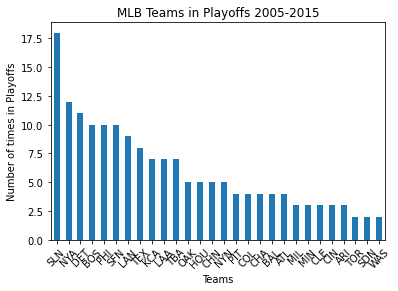

In [6]:
playoff_count_df = playoffs_df['teamIDwinner'].append(playoffs_df['teamIDloser'])

playoff_count_df = playoff_count_df.value_counts()

playoff_chart = playoff_count_df.plot.bar(rot=45)
plt.title("MLB Teams in Playoffs 2005-2015")
plt.xlabel("Teams")
plt.ylabel("Number of times in Playoffs")
playoff_chart
playoff_count_df.count()

In [7]:
#MONEY SECTION
#How much is a team that got to the playoffs between 2005-2015 spending #per year
# #What is the average per team per general player per    
# Create 2 dataframes answering 2 objectives:
# salaries_describe['Sum'] - How much is a play offs team spends total per year 
# salaries_describe['mean'] - How much the playoff team spends per general player per year
# top_ten_sum; top_ten_mean - Find the teams that spend Too Much - top 10% (?) 
# Make Bar graph for 1 and 2

salaries_test_df = salaries_df.loc[salaries_df['teamID'].isin(playoff_count_df.index)]

salaries_test_df = salaries_test_df.groupby(['yearID', 'teamID'])
salaries_describe = salaries_test_df.describe()
salaries_describe['salary','Sum'] = salaries_test_df.sum()

quantile_09 = salaries_describe.quantile(.9)

top_ten_mean = salaries_describe.loc[salaries_describe['salary','mean']>quantile_09['salary']['mean']]
top_ten_sum = salaries_describe.loc[salaries_describe['salary','Sum']>quantile_09['salary']['Sum']]



In [8]:
top_ten_mean

salary                                                    \
               count          mean           std       min         25%   
yearID teamID                                                            
2005   NYA      26.0  8.011801e+06  7.117015e+06  317200.0  2187500.00   
2006   NYA      28.0  6.952253e+06  7.343890e+06  328600.0   912500.00   
2007   NYA      28.0  6.759252e+06  7.725153e+06  382048.0   450042.25   
2008   NYA      30.0  6.929893e+06  8.164959e+06  390000.0   400312.50   
2009   CHN      25.0  5.392360e+06  6.194445e+06  400000.0   500000.00   
       NYA      26.0  7.748046e+06  8.596408e+06  400000.0   438506.25   
       NYN      28.0  5.334785e+06  5.607904e+06  400000.0  1093750.00   
2010   BOS      29.0  5.601632e+06  5.100972e+06  415500.0   905000.00   
       CHN      27.0  5.429963e+06  6.625155e+06  400000.0   750000.00   
       NYA      25.0  8.253336e+06  9.267188e+06  410800.0   487975.00   
2011   BOS      27.0  5.991203e+06  5.576433e+06  417000.0   887500.00   
       NYA      29.0  6.975001e+06  8.531288e+06  419300.0   650000.00   
       PHI      30.0  5.765879e+06  6.227551e+06  414000.0   570000.00   
2012   LAA      29.0  5.327075e+06  6.212772e+06  480000.0   500000.00   
       NYA      29.0  6.776631e+06  8.119776e+06  482000.0   528475.00   
       PHI      30.0  5.817965e+06  6.833158e+06  480000.0   497500.00   
2013   DET      24.0  6.082896e+06  6.873032e+06  490000.0   763750.00   
       LAN      32.0  6.980069e+06  7.203055e+06  490500.0  1215500.00   
       NYA      31.0  7.483190e+06  8.784431e+06  490000.0   546812.50   
       PHI      26.0  6.533200e+06  8.200819e+06  490000.0   507500.00   
2014   DET      23.0  6.645891e+06  7.276494e+06  500000.0   515000.00   
       LAN      32.0  6.781706e+06  7.414982e+06  501000.0   925000.00   
       NYA      24.0  8.230996e+06  8.609457e+06  502100.0   537918.75   
       PHI      32.0  5.654530e+06  7.551086e+06  500000.0   500000.00   
       SFN      28.0  5.839649e+06  5.751721e+06  500500.0   848750.00   
2015   BOS      32.0  5.659481e+06  6.241481e+06  508500.0   539875.00   
       DET      25.0  6.891390e+06  8.081387e+06  507500.0   520000.00   
       LAN      29.0  7.441103e+06  8.570340e+06  510000.0   693000.00   
       NYA      29.0  7.336274e+06  8.355235e+06  507500.0   554100.00   
       SFN      27.0  6.100056e+06  6.091981e+06  509000.0  1275000.00   
       WAS      29.0  5.365085e+06  5.965111e+06  507500.0   525000.00   

                                                              
                     50%          75%         max        Sum  
yearID teamID                                                 
2005   NYA     5833333.5  12839285.75  26000000.0  208306817  
2006   NYA     2925000.0  12250000.00  21680727.0  194663079  
2007   NYA     2250000.0  12250000.00  23428571.0  189259045  
2008   NYA     2437500.0  13000000.00  28000000.0  207896789  
2009   CHN     2200000.0   9000000.00  18750000.0  134809000  
       NYA     5200000.0  13075000.00  33000000.0  201449189  
       NYN     2612500.0   8104166.50  19243682.0  149373987  
2010   BOS     3750000.0   9000000.00  18700000.0  162447333  
       CHN     2125000.0  12875000.00  19000000.0  146609000  
       NYA     5500000.0  13100000.00  33000000.0  206333389  
2011   BOS     5500000.0  11166666.50  17000000.0  161762475  
       NYA     2700000.0  10000000.00  32000000.0  202275028  
       PHI     2625000.0  10250000.00  20000000.0  172976379  
2012   LAA     3150000.0   9000000.00  24187500.0  154485166  
       NYA     2800000.0  10250000.00  30000000.0  196522289  
       PHI     1875000.0  10475000.00  21500000.0  174538938  
2013   DET     3750000.0   7243750.00  23000000.0  145989500  
       LAN     4230749.5  12104166.75  21857143.0  223362196  
       NYA     2850000.0  13500000.00  29000000.0  231978886  
       PHI     1375000.0  12500000.00  25000000.0  169863189  
2014   DET     2500000.0  13000000.00  22000000.

In [9]:
top_ten_sum

salary                                                    \
               count          mean           std       min         25%   
yearID teamID                                                            
2005   NYA      26.0  8.011801e+06  7.117015e+06  317200.0  2187500.00   
2006   NYA      28.0  6.952253e+06  7.343890e+06  328600.0   912500.00   
2007   NYA      28.0  6.759252e+06  7.725153e+06  382048.0   450042.25   
2008   NYA      30.0  6.929893e+06  8.164959e+06  390000.0   400312.50   
2009   NYA      26.0  7.748046e+06  8.596408e+06  400000.0   438506.25   
       NYN      28.0  5.334785e+06  5.607904e+06  400000.0  1093750.00   
2010   BOS      29.0  5.601632e+06  5.100972e+06  415500.0   905000.00   
       CHN      27.0  5.429963e+06  6.625155e+06  400000.0   750000.00   
       NYA      25.0  8.253336e+06  9.267188e+06  410800.0   487975.00   
2011   BOS      27.0  5.991203e+06  5.576433e+06  417000.0   887500.00   
       NYA      29.0  6.975001e+06  8.531288e+06  419300.0   650000.00   
       PHI      30.0  5.765879e+06  6.227551e+06  414000.0   570000.00   
2012   BOS      34.0  5.093724e+06  6.311422e+06  482000.0   756250.00   
       LAA      29.0  5.327075e+06  6.212772e+06  480000.0   500000.00   
       NYA      29.0  6.776631e+06  8.119776e+06  482000.0   528475.00   
       PHI      30.0  5.817965e+06  6.833158e+06  480000.0   497500.00   
2013   BOS      29.0  5.225172e+06  4.829211e+06  498000.0  1475000.00   
       LAN      32.0  6.980069e+06  7.203055e+06  490500.0  1215500.00   
       NYA      31.0  7.483190e+06  8.784431e+06  490000.0   546812.50   
       PHI      26.0  6.533200e+06  8.200819e+06  490000.0   507500.00   
2014   DET      23.0  6.645891e+06  7.276494e+06  500000.0   515000.00   
       LAN      32.0  6.781706e+06  7.414982e+06  501000.0   925000.00   
       NYA      24.0  8.230996e+06  8.609457e+06  502100.0   537918.75   
       PHI      32.0  5.654530e+06  7.551086e+06  500000.0   500000.00   
       SFN      28.0  5.839649e+06  5.751721e+06  500500.0   848750.00   
2015   BOS      32.0  5.659481e+06  6.241481e+06  508500.0   539875.00   
       DET      25.0  6.891390e+06  8.081387e+06  507500.0   520000.00   
       LAN      29.0  7.441103e+06  8.570340e+06  510000.0   693000.00   
       NYA      29.0  7.336274e+06  8.355235e+06  507500.0   554100.00   
       SFN      27.0  6.100056e+06  6.091981e+06  509000.0  1275000.00   
       WAS      29.0  5.365085e+06  5.965111e+06  507500.0   525000.00   

                                                              
                     50%          75%         max        Sum  
yearID teamID                                                 
2005   NYA     5833333.5  12839285.75  26000000.0  208306817  
2006   NYA     2925000.0  12250000.00  21680727.0  194663079  
2007   NYA     2250000.0  12250000.00  23428571.0  189259045  
2008   NYA     2437500.0  13000000.00  28000000.0  207896789  
2009   NYA     5200000.0  13075000.00  33000000.0  201449189  
       NYN     2612500.0   8104166.50  19243682.0  149373987  
2010   BOS     3750000.0   9000000.00  18700000.0  162447333  
       CHN     2125000.0  12875000.00  19000000.0  146609000  
       NYA     5500000.0  13100000.00  33000000.0  206333389  
2011   BOS     5500000.0  11166666.50  17000000.0  161762475  
       NYA     2700000.0  10000000.00  32000000.0  202275028  
       PHI     2625000.0  10250000.00  20000000.0  172976379  
2012   BOS     1556250.0   7943750.00  21857142.0  173186617  
       LAA     3150000.0   9000000.00  24187500.0  154485166  
       NYA     2800000.0  10250000.00  30000000.0  196522289  
       PHI     1875000.0  10475000.00  21500000.0  174538938  
2013   BOS     4100000.0   9000000.00  15950000.0  151530000  
       LAN     4230749.5  12104166.75  21857143.0  223362196  
       NYA     2850000.0  13500000.00  29000000.0  231978886  
       PHI     1375000.0  12500000.00  25000000.0  169863189  
2014   DET     2500000.0  13000000.00  22000000.

In [1]:
#PLAYERS SALARIES SECTION

salaries_df = pd.read_csv("./Salaries.csv")
salaries_df.head()
salaries_df.count

NameError: name 'pd' is not defined

In [7]:
#select years 2005-2015
salaries_yr = salaries_df.loc[salaries_df['yearID'] > 2004]
salaries_yr.count
#salaries_yr.head()

<bound method DataFrame.count of        yearID teamID lgID   playerID    salary
16463    2005    ARI   NL  aquingr01    325000
16464    2005    ARI   NL  brunebr01    322500
16465    2005    ARI   NL  choatra01    550000
16466    2005    ARI   NL  cintral01    360000
16467    2005    ARI   NL  clarkto02    750000
...       ...    ...  ...        ...       ...
25570    2015    WAS   NL  treinbl01    512800
25571    2015    WAS   NL  ugglada01    507500
25572    2015    WAS   NL  werthja01  21000000
25573    2015    WAS   NL  zimmejo02  16500000
25574    2015    WAS   NL  zimmery01  14000000

[9112 rows x 5 columns]>

In [34]:
#Find top salaries - using df with years 2005-2015 and selecting for playoff teams
#Looking for top 10%, narrow down to 900ish rows

#salaries_yr.describe()
salaries_yr_df = salaries_yr.loc[salaries_yr['teamID'].isin(playoff_count_df.index)]
salaries_yr_df

millions_of_dollars  = salaries_yr_df["salary"]/1000000
salaries_yr_df["Salary in Millions"] = millions_of_dollars
salaries_yr_df

salaries_millions = salaries_yr_df.loc[salaries_yr_df["Salary in Millions"]>9.5]
salaries_millions

#groupby players
top_total_spenders = salaries_millions.groupby(["playerID", "yearID"]).sum()
top_total_spenders.head(30)
#top_total_spenders.count()


<ipython-input-34-3016f9548abe>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaries_yr_df["Salary in Millions"] = millions_of_dollars


salary  Salary in Millions
playerID  yearID                              
abreubo01 2005    13100000           13.100000
          2006    13600000           13.600000
          2007    15000000           15.000000
          2008    16000000           16.000000
anderbr04 2015    10000000           10.000000
anderga01 2005     9600000            9.600000
          2006    10600000           10.600000
          2007    11600000           11.600000
          2008    12600000           12.600000
andruel01 2015    15000000           15.000000
arroybr01 2009    10125000           10.125000
          2010    11625000           11.625000
          2013    16445535           16.445535
bagweje01 2005    18000000           18.000000
          2006    19369019           19.369019
baileho02 2015    10000000           10.000000
bautijo02 2012    14000000           14.000000
          2013    14000000           14.000000
          2014    14000000           14.000000
          2015    14000000           14.000000
bayja01   2011    18125000           18.125000
          2012    18125000           18.125000
beckejo02 2008    10166666           10.166666
          2009    11166666           11.166666
          2010    12100000           12.100000
          2011    17000000           17.000000
          2012    17000000           17.000000
          2013    17000000           17.000000
          2014    15750000           15.750000
bellhe01  2013    10000000           10.000000

In [25]:
top_total_spenders["Average Salary"]= top_total_spenders.sum()
#How to fill in average column??


In [35]:
top_total_spenders_sorted = top_total_spenders.sort_values(["Salary in Millions"], ascending=False)
top_total_spenders_sorted.head(15)


salary  Salary in Millions
playerID  yearID                              
rodrial01 2009    33000000             33.0000
          2010    33000000             33.0000
kershcl01 2015    32571000             32.5710
rodrial01 2011    32000000             32.0000
          2012    30000000             30.0000
          2013    29000000             29.0000
verlaju01 2015    28000000             28.0000
rodrial01 2008    28000000             28.0000
wellsve01 2011    26187500             26.1875
rodrial01 2005    26000000             26.0000
greinza01 2014    26000000             26.0000
howarry01 2015    25000000             25.0000
leecl02   2013    25000000             25.0000
howarry01 2014    25000000             25.0000
greinza01 2015    25000000             25.0000

In [11]:
#Top 10 earners average


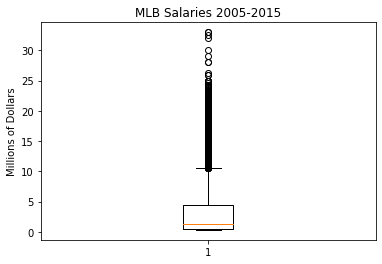

In [41]:
salaries = salaries_yr_df["Salary in Millions"]
fig1, ax1 = plt.subplots()
ax1.set_title('MLB Salaries 2005-2015')
ax1.set_ylabel('Millions of Dollars')
ax1.boxplot(salaries)
plt.show()